<a href="https://colab.research.google.com/github/Sudeepr2012/Fraud_detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [ ]:
#import the data
data=pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")

In [ ]:
#preview the data
data.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
#view the value counts of each class
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We can see that the data is highly unbalanced

In [ ]:
#Seperating the legit and fraud cases
legit= data[data.Class==0]
fraud=data[data.Class==1]

In [ ]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#balancing the data
import tensorflow as tf
tf.random.set_seed(42)
legit_red=legit.sample(492)

In [ ]:
#making a new balanced dataset
data_new=pd.concat([legit_red, fraud], axis=0)

In [ ]:
data_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70430,53863.0,-1.266817,0.579145,0.785907,0.611968,2.361072,-0.494532,1.531823,-0.414221,-1.246088,0.116955,-1.899792,-0.435521,0.880587,-0.199748,-0.970241,1.171661,-1.807049,-0.186328,-1.861753,-0.259838,-0.081506,-0.013911,0.123324,-1.018372,0.630603,-0.210206,-0.188032,-0.181488,0.75,0
23068,32570.0,-0.783247,0.068763,2.319153,-1.799607,-0.612391,0.542733,-0.206647,0.292895,-1.012355,0.022891,0.094176,0.920942,1.609188,-0.895942,-1.220091,-0.808871,-0.660321,1.661035,-0.470867,-0.140259,-0.451011,-0.628477,-0.230414,-0.448510,0.206644,0.932613,0.251165,0.110970,30.72,0
160576,113471.0,2.027248,-0.123314,-3.187138,-0.603106,2.685489,3.011201,-0.370792,0.722885,0.439019,-0.458820,0.410815,0.060823,-0.193636,-0.523221,1.322271,0.133364,0.311849,0.384232,-0.559449,-0.112116,0.198270,0.607648,0.011628,0.637274,0.286212,-0.081426,0.014987,-0.036266,12.14,0
236110,148670.0,-1.276606,0.781967,0.592544,-0.483963,2.414370,0.855608,1.273145,0.161515,-0.594324,-0.274043,0.711582,0.090693,-1.478522,0.559165,-0.835605,-1.181230,0.027753,-1.219593,-1.386546,-0.221866,0.036634,0.485890,-0.720734,-1.517049,1.124649,-0.363827,0.029607,-0.175221,3.18,0
261625,160108.0,-1.478098,1.564432,-0.039495,-0.600236,-0.937173,0.968656,-2.749961,-8.002158,-0.498632,-2.534357,-1.205572,0.570290,-1.233774,1.450048,0.118645,0.343851,0.081817,0.113571,-0.949887,1.704135,-3.552989,1.951530,-0.472438,0.037873,1.736938,0.541505,-0.021151,0.188975,118.95,0


In [ ]:
#compare the means of each class
data_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,92412.050813,0.099873,0.053840,0.104600,-0.041364,0.075159,0.029732,0.046269,0.070823,-0.009110,-0.023683,0.035297,0.014919,-0.054407,0.091856,0.001346,-0.000268,-0.040706,-0.020054,0.082151,-0.005977,-0.008371,0.004000,0.001437,-0.033278,-0.007765,-0.001673,-0.005706,0.004433,70.048760
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#spliiting into features and targets
x=data_new.drop(["Class"], axis=1)
y=data_new["Class"]
x,y

(            Time        V1        V2  ...       V27       V28  Amount
 70430    53863.0 -1.266817  0.579145  ... -0.188032 -0.181488    0.75
 23068    32570.0 -0.783247  0.068763  ...  0.251165  0.110970   30.72
 160576  113471.0  2.027248 -0.123314  ...  0.014987 -0.036266   12.14
 236110  148670.0 -1.276606  0.781967  ...  0.029607 -0.175221    3.18
 261625  160108.0 -1.478098  1.564432  ... -0.021151  0.188975  118.95
 ...          ...       ...       ...  ...       ...       ...     ...
 279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
 280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
 280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
 281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
 281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53
 
 [984 rows x 30 columns], 70430     0
 23068     0
 160576    0
 236110    0
 261625    0
          ..
 279863    1
 280143    1
 280149    1
 281

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, stratify= y, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
#building a model with 94.4% accuracy
tf.random.set_seed(42)
model=tf.keras.Sequential([
              tf.keras.layers.Dense(10, activation="relu"),
              tf.keras.layers.Dense(4, activation="relu"),
              tf.keras.layers.Dense(10, activation="relu"),
              tf.keras.layers.Dense(15, activation="relu"),
              tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=3e-4),  
              metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=500, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9442


[0.17787230014801025, 0.9441624283790588]

Text(0.5, 0, 'epochs')

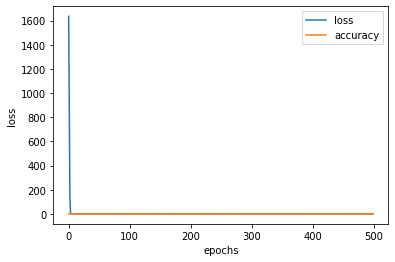

In [ ]:
#plotting loss vs epochs
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")